# Importing

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from itertools import product

# Blob Dataset for visualizing decision boundry

In [2]:
X, y = make_blobs(n_samples=10000, centers=6)
print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (10000, 2)
<class 'numpy.ndarray'> (10000,)


# Initial Data Visualization

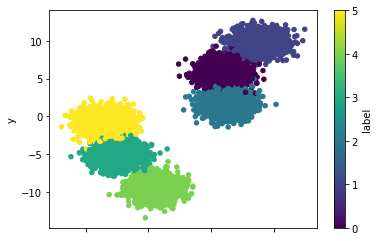

In [3]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.plot(kind='scatter', x='x', y='y', c='label',colormap='viridis')

# Using np.meshgird , np.c_ and ravel() functions to make decision boundry

In [4]:
h=0.2
x_min, x_max = df['x'].values.min()- .5, df['x'].values.max() + .5
y_min, y_max = df['y'].values.min() - .5, df['y'].values.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

print(type(xx), xx.shape)
print(type(yy), yy.shape)

<class 'numpy.ndarray'> (136, 102)
<class 'numpy.ndarray'> (136, 102)


# Logistic Regression for creating Decision Boundry

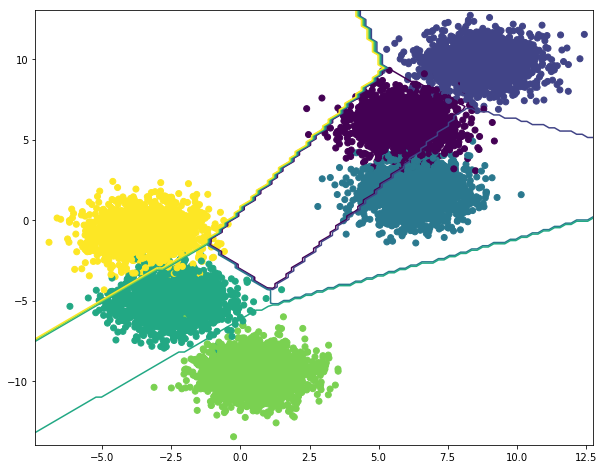

In [5]:
lr_clf = LogisticRegression(C=100)
lr_clf.fit(df[['x', 'y']], df['label'])

Z = lr_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
f, axarr = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
axarr.contour(xx, yy, Z)
axarr.scatter(df.x, df.y, c=y)

# Decision Boundry for different C values

- Initialize the subplot fig axis to required figs (say for 4 figs , use (2,2)
- fit the models for each value of c and create Z value using fit 

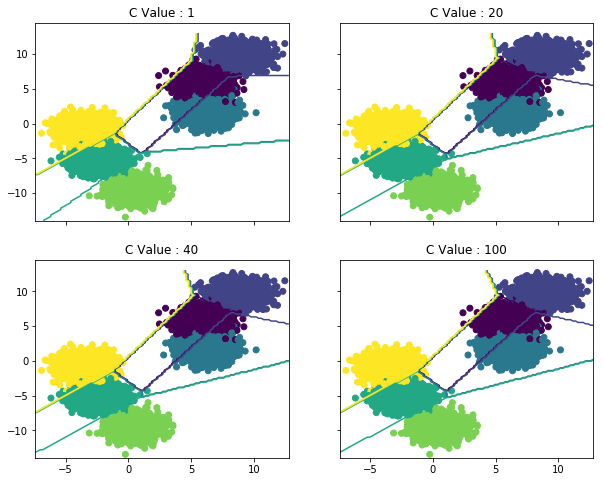

In [6]:
C_Values = [1, 20, 40, 100]
pos = product([0, 1], [0, 1])
f, axarr = pyplot.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
for c, position in zip(C_Values, pos):
    lr_clf = LogisticRegression(C=c)
    lr_clf.fit(df[['x', 'y']], df['label'])
    Z = lr_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    i, j  = position
    axarr[i, j].contour(xx, yy, Z)
    axarr[i, j].scatter(df.x, df.y, c=y)
    axarr[i, j].set_title("C Value : {}".format(c))